In [ ]:
# Execute this cell to install dependencies
%pip install sf-hamilton[visualization]

# Example of using with_columns for Polars DataFrame [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dagworks-inc/hamilton/blob/main/examples/polars/with_columns/notebook.ipynb) [![GitHub badge](https://img.shields.io/badge/github-view_source-2b3137?logo=github)](https://github.com/dagworks-inc/hamilton/blob/main/examples/polars/with_columns/notebook.ipynb)

This allows you to efficiently run groups of map operations on a dataframe.
Here's an example of calling it -- if you've seen `@subdag`, you should be familiar with the concepts.

In [1]:
%reload_ext hamilton.plugins.jupyter_magic
from hamilton import driver
import my_functions

my_builder = driver.Builder().with_modules(my_functions).with_config({"case":"thousands"})
output_node = ["final_df"]

/Users/jernejfrank/miniconda3/envs/hamilton/lib/python3.10/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


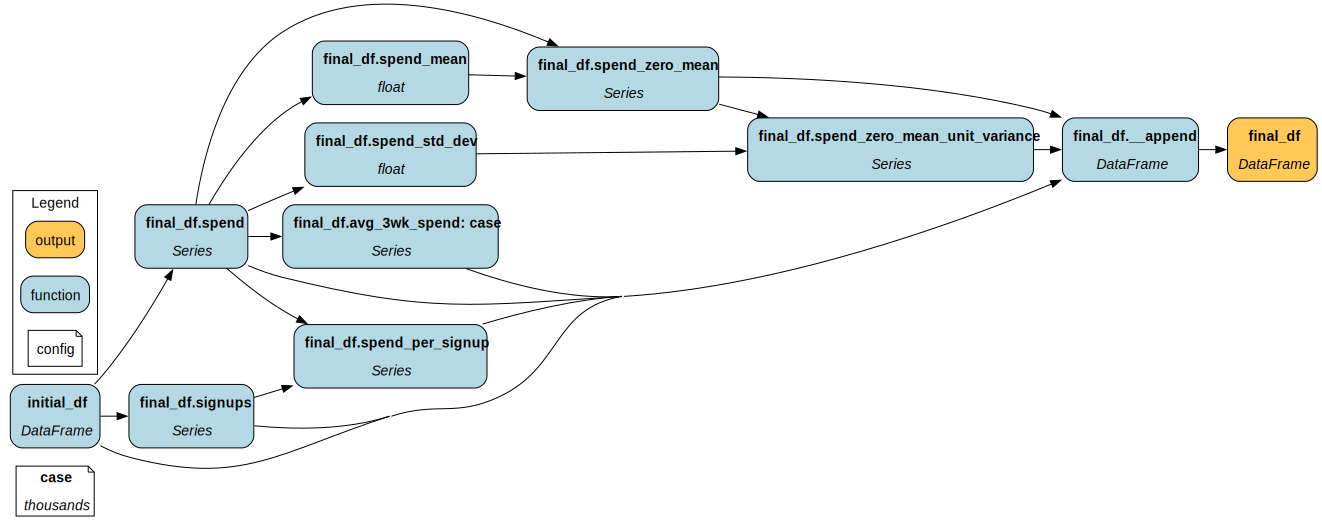

In [2]:
%%cell_to_module with_columns_example --builder my_builder --display --execute output_node
import polars as pl
from hamilton.plugins.h_polars import with_columns
import my_functions

output_columns = [
    "spend",
    "signups",
    "avg_3wk_spend",
    "spend_per_signup",
    "spend_zero_mean_unit_variance",
]

def initial_df()->pl.DataFrame:
    return pl.DataFrame(
        { 
            "signups": pl.Series([1, 10, 50, 100, 200, 400]),
            "spend": pl.Series([10, 10, 20, 40, 40, 50])*1e6,
            }
            )

# the with_columns call
@with_columns(
    *[my_functions],
    columns_to_pass=["spend", "signups"], # The columns to select from the dataframe
    # select=output_columns, # The columns to append to the dataframe
    # config_required = ["a"]
)
def final_df(initial_df: pl.DataFrame) -> pl.DataFrame:
    return initial_df

shape: (6, 6)
┌─────────┬───────┬───────────────┬──────────────────┬─────────────────┬───────────────────────────┐
│ signups ┆ spend ┆ avg_3wk_spend ┆ spend_per_signup ┆ spend_zero_mean ┆ spend_zero_mean_unit_vari │
│ ---     ┆ ---   ┆ ---           ┆ ---              ┆ ---             ┆ ance                      │
│ i64     ┆ f64   ┆ f64           ┆ f64              ┆ f64             ┆ ---                       │
│         ┆       ┆               ┆                  ┆                 ┆ f64                       │
╞═════════╪═══════╪═══════════════╪══════════════════╪═════════════════╪═══════════════════════════╡
│ 1       ┆ 1e7   ┆ null          ┆ 1e7              ┆ -1.8333e7       ┆ -1.064405                 │
│ 10      ┆ 1e7   ┆ null          ┆ 1e6              ┆ -1.8333e7       ┆ -1.064405                 │
│ 50      ┆ 2e7   ┆ 13.333333     ┆ 400000.0         ┆ -8.3333e6       ┆ -0.483821                 │
│ 100     ┆ 4e7   ┆ 23.333333     ┆ 400000.0         ┆ 1.1667e7        ┆ 0.67

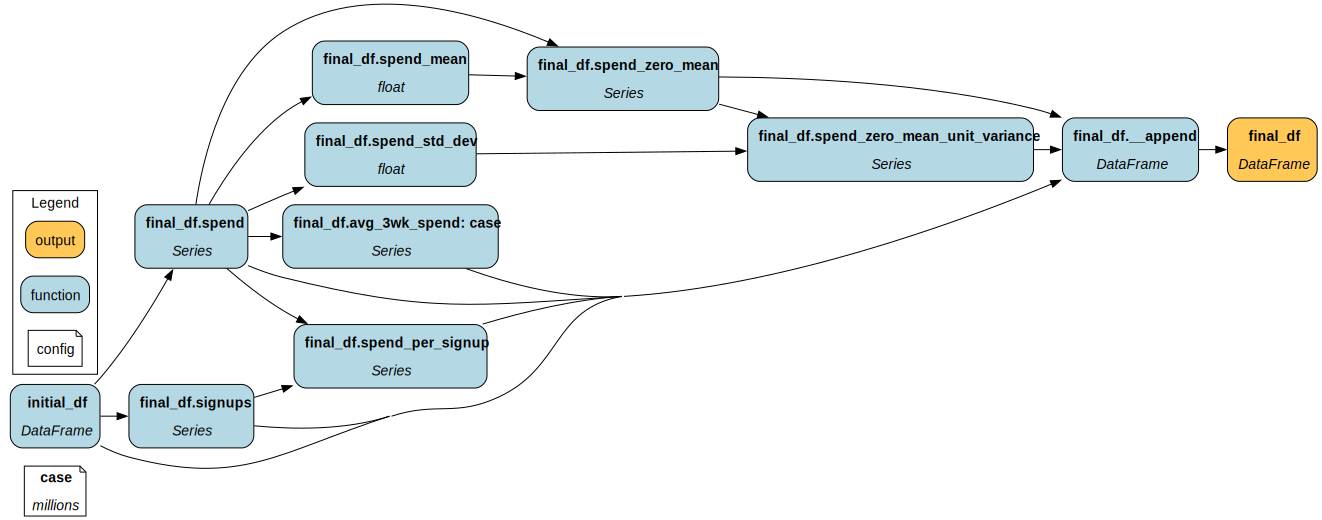

In [3]:
import with_columns_example
dr = driver.Builder().with_modules(my_functions, with_columns_example).with_config({"case":"millions"}).build()
print(dr.execute(final_vars=["final_df"])["final_df"])
dr.visualize_execution(final_vars=["final_df"])


# Example of using with_columns for Polars LazyFrame

This allows you to efficiently run groups of map operations on a dataframe.
Here's an example of calling it -- if you've seen `@subdag`, you should be familiar with the concepts.

In [4]:
%reload_ext hamilton.plugins.jupyter_magic
from hamilton import driver
import my_functions_lazy

my_builder_lazy = driver.Builder().with_modules(my_functions_lazy).with_config({"case":"thousands"})
output_node = ["final_df"]

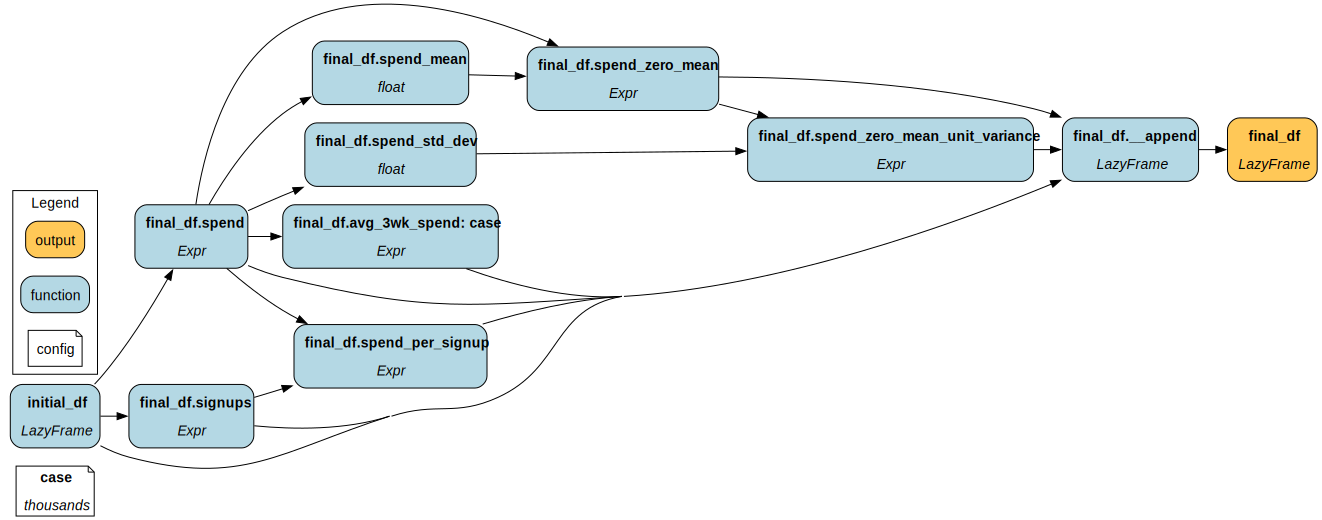

In [5]:
%%cell_to_module with_columns_lazy_example --builder my_builder_lazy --display --execute output_node
import polars as pl
from hamilton.plugins.h_polars_lazyframe import with_columns
import my_functions_lazy

output_columns = [
    "spend",
    "signups",
    "avg_3wk_spend",
    "spend_per_signup",
    "spend_zero_mean_unit_variance",
]

def initial_df()->pl.LazyFrame:
    return pl.DataFrame(
        { 
            "signups": pl.Series([1, 10, 50, 100, 200, 400]),
            "spend": pl.Series([10, 10, 20, 40, 40, 50])*1e6,
            }
            ).lazy()

# the with_columns call
@with_columns(
    *[my_functions_lazy],
    columns_to_pass=["spend", "signups"], # The columns to select from the dataframe
    # select=output_columns, # The columns to append to the dataframe
    # config_required = ["a"]
)
def final_df(initial_df: pl.LazyFrame) -> pl.LazyFrame:
    return initial_df

shape: (6, 6)
┌─────────┬───────┬───────────────┬──────────────────┬─────────────────┬───────────────────────────┐
│ signups ┆ spend ┆ avg_3wk_spend ┆ spend_per_signup ┆ spend_zero_mean ┆ spend_zero_mean_unit_vari │
│ ---     ┆ ---   ┆ ---           ┆ ---              ┆ ---             ┆ ance                      │
│ i64     ┆ f64   ┆ f64           ┆ f64              ┆ f64             ┆ ---                       │
│         ┆       ┆               ┆                  ┆                 ┆ f64                       │
╞═════════╪═══════╪═══════════════╪══════════════════╪═════════════════╪═══════════════════════════╡
│ 1       ┆ 1e7   ┆ null          ┆ 1e7              ┆ -1.8333e7       ┆ -1.064405                 │
│ 10      ┆ 1e7   ┆ null          ┆ 1e6              ┆ -1.8333e7       ┆ -1.064405                 │
│ 50      ┆ 2e7   ┆ 13.333333     ┆ 400000.0         ┆ -8.3333e6       ┆ -0.483821                 │
│ 100     ┆ 4e7   ┆ 23.333333     ┆ 400000.0         ┆ 1.1667e7        ┆ 0.67

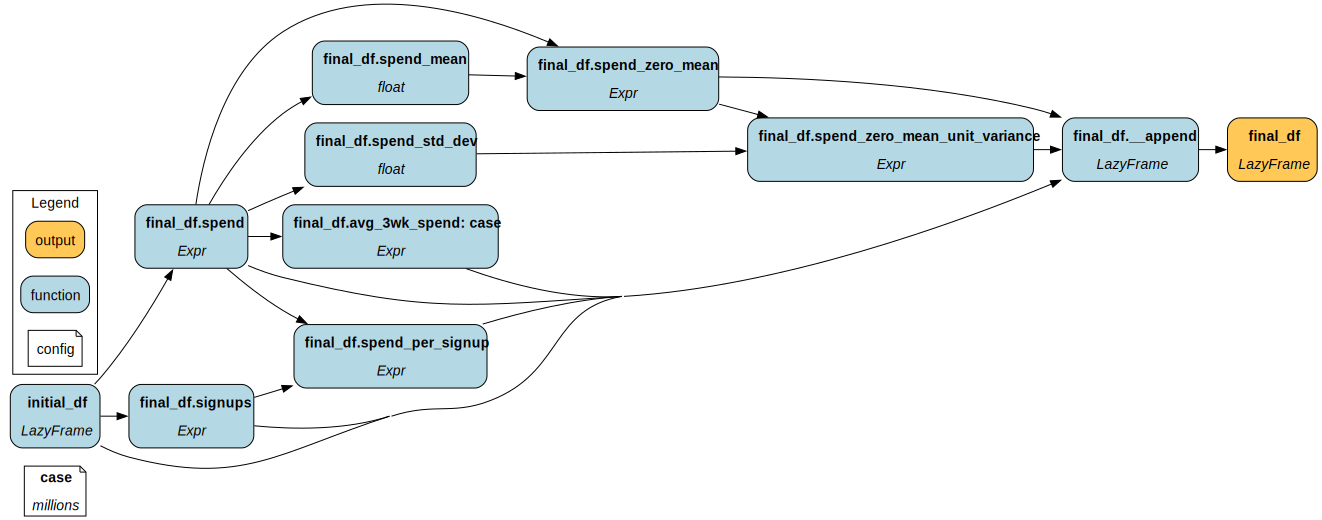

In [6]:
import with_columns_lazy_example
from hamilton import base
from hamilton.plugins import h_polars

dr = (
    driver.Builder()
    .with_adapter(
        adapter=base.SimplePythonGraphAdapter(result_builder=h_polars.PolarsDataFrameResult()))
    .with_modules(my_functions_lazy, with_columns_lazy_example)
    .with_config({"case":"millions"})
    .build()
    )
print(dr.execute(final_vars=["final_df"]))
dr.visualize_execution(final_vars=["final_df"])
